# Leggett-Garg factor for Feedback ME

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import cmath 
import statsmodels.api as sm
import scipy as sp
import os
import random 
%run Functions.ipynb

In [2]:
directory = 'TrajectoriesFeedback2'


arrays = []

for filename in os.listdir(directory):
    if filename.endswith('.txt'):  
        filepath = os.path.join(directory, filename)
        data = np.loadtxt(filepath, dtype=complex)
        arrays.append(data.real)

In [3]:
dt = 0.1
times = np.arange(0, 30, dt)
combined_array = np.concatenate(arrays, axis=0)

In [4]:
combined_array.shape

(780000, 300)

In [5]:
trajectory = combined_array.mean(axis = 0)

### Unconditional solution

In [6]:
chi = 0.1
omega = 0.3
T = 10.
mu = 0.02
zin = 1/np.sqrt(2)
yin = 1/np.sqrt(2)
B = 2*omega+2*T*mu+2*chi*mu
delta = 4*B**2-chi**4/4
alpha = 2*mu**2+1/4*chi**2
Cost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+zin
Cost2 = 1/np.sqrt(delta)*(1/2*chi**2*zin+2*B*yin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))
Cost3 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)
z = np.exp(-alpha*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*times)+Cost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3

Text(0.5, 1.0, 'Feedback ME Unconditional Solution for 780000 trajectories')

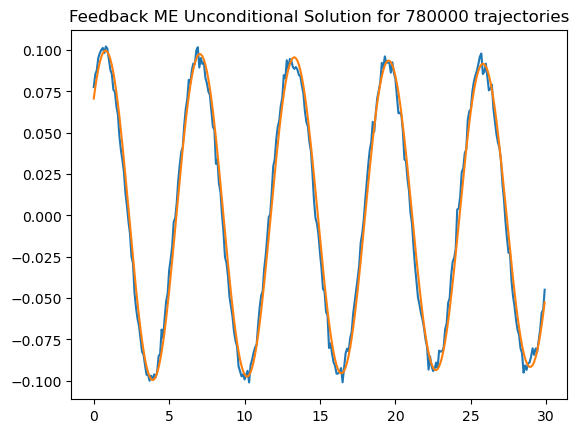

In [7]:
plt.plot(times[:len(trajectory)],trajectory)
plt.plot(times[:len(trajectory)],chi*z )
plt.title(f'Feedback ME Unconditional Solution for {combined_array.shape[0]} trajectories')

In [8]:
new = legg_ensemble(combined_array)

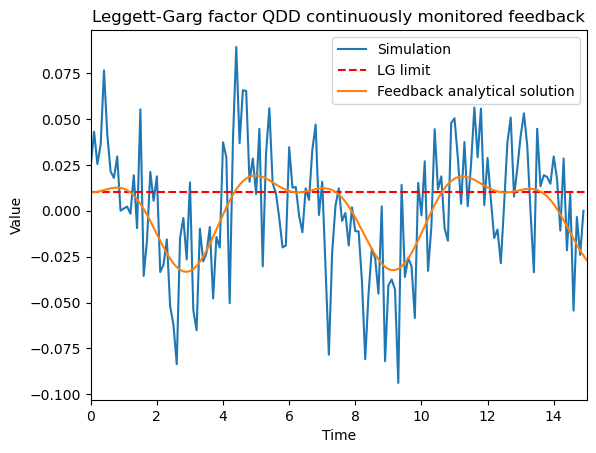

In [9]:
plot_legg_feed(times, new, 0.02)